<a href="https://colab.research.google.com/github/jaikji96/python-projects/blob/master/implementation_of_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

pd.set_option("display.max_colwidth",200)

In [0]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle =True,random_state=1,remove=('headers','footers','quotes'))

In [0]:
documents = dataset.data

In [0]:
len(documents)

11314

In [0]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
dataset.target

array([17,  0, 17, ...,  9,  4,  9])

In [0]:
len(dataset.target)

11314

**DATA PREPROCESSING**

*To start with, we will try to clean our text data as much as possible. The idea is to remove the punctuations, numbers, and special characters all in one step using the regex replace(“[^a-zA-Z#]”, ” “), which will replace everything, except alphabets with space.*

In [0]:
news_df = pd.DataFrame({'doc':documents})

In [0]:
#removing everything except alphabets

news_df['clean_doc']=news_df['doc'].str.replace("[^a-zA-Z#]", " ")

In [0]:
news_df.head()

,doc,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,Well i m not sure about the story nad it did seem biased What I disagree with is your statement that the U S Media is out to ruin Israels reputation That is rediculous The U S media is the mo...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",Yeah do you expect people to read the FAQ etc and actually accept hard atheism No you need a little leap of faith Jimmy Your logic runs out of steam Jim Sorry I can t pit...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",Although I realize that principle is not one of your strongest points I would still like to know why do do not ask any question of this sort about the Arab countries If you want to continue ...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",Notwithstanding all the legitimate fuss about this proposal how much of a change is it ATT s last product in this area a was priced over as I suspect clipper phones will be b came...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",Well I will have to change the scoring on my playoff pool Unfortunately I don t have time right now but I will certainly post the new scoring rules by tomorrow Does it matter No you ll en...


In [0]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
doc          11314 non-null object
clean_doc    11314 non-null object
dtypes: object(2)
memory usage: 176.9+ KB


In [0]:
#removing short words from the data set

news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [0]:
#make all the text lowercase

news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: x.lower())

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = stopwords.words('english')

In [0]:
stop_words

In [0]:
#tokenisation

tokenised_Doc = news_df['clean_doc'].apply(lambda x: x.split())

In [0]:
#remove stop_words

tokenised_doc= tokenised_Doc.apply(lambda x:[item for item in x if item not in stop_words])

In [0]:
#detokenised

detokenised_doc = []

for i in range(len(news_df)):
  t=' '.join(tokenised_doc[i])
  detokenised_doc.append(t)
  
 
news_df['clean_doc']=detokenised_doc

In [0]:
news_df.head()

,doc,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgrou...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize principle strongest points would still like know question sort arab countries want continue think tank charade fixation israel must stop might start asking sort questions arab cou...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss proposal much change last product area priced suspect clipper phones came customer automatically preregistered government authorities thus aside attempting legitimi...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well change scoring playoff pool unfortunately time right certainly post scoring rules tomorrow matter enter anyway good keith keller rangers quakers kkeller mail upenn league champs


**DOCUMENT-TERM MATRIX**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf = True)

In [0]:
vectorizer.dtype

numpy.float64

In [0]:
X= vectorizer.fit_transform(news_df['clean_doc'])

In [0]:
X.shape

(11314, 1000)

**Topic MODELLING**

*The next step is to represent each and every term and document as a vector. We will use the document-term matrix and decompose it into multiple matrices. We will use sklearn’s TruncatedSVD to perform the task of matrix decomposition.*

*Since the data comes from 20 different newsgroups, let’s try to have 20 topics for our text data. The number of topics can be specified by using the n_components parameter.*

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
#SVD reprensent documents and terms in vector

svd_model = TruncatedSVD(n_components=20,algorithm='randomized',n_iter=100,random_state=122)

In [0]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=100,
       random_state=122, tol=0.0)

In [0]:
len(svd_model.components_)

20

The components of svd_model are our topics, and we can access them using svd_model.components_. Finally, let’s print a few most important words in each of the 20 topics and see how our model has done.

In [0]:
terms = vectorizer.get_feature_names()

In [0]:
for i,comp in enumerate(svd_model.components_):
  terms_comp = zip(terms,comp)
  sorted_terms = sorted(terms_comp, key=lambda x:x[1],reverse=True)[:7]
  
  print("TOPIC "+str(i)+": ")
  
  for t in sorted_terms:
    print(t[0])
    print(" ")
    

TOPIC 0: 
like
 
know
 
people
 
think
 
good
 
time
 
thanks
 
TOPIC 1: 
thanks
 
windows
 
card
 
drive
 
mail
 
file
 
advance
 
TOPIC 2: 
game
 
team
 
year
 
games
 
season
 
players
 
good
 
TOPIC 3: 
drive
 
scsi
 
disk
 
hard
 
card
 
drives
 
problem
 
TOPIC 4: 
windows
 
file
 
window
 
files
 
program
 
using
 
problem
 
TOPIC 5: 
government
 
chip
 
mail
 
space
 
information
 
encryption
 
data
 
TOPIC 6: 
like
 
bike
 
know
 
chip
 
sounds
 
looks
 
look
 
TOPIC 7: 
card
 
sale
 
video
 
offer
 
monitor
 
price
 
jesus
 
TOPIC 8: 
know
 
card
 
chip
 
video
 
government
 
people
 
clipper
 
TOPIC 9: 
good
 
know
 
time
 
bike
 
jesus
 
problem
 
work
 
TOPIC 10: 
think
 
chip
 
good
 
thanks
 
clipper
 
need
 
encryption
 
TOPIC 11: 
thanks
 
right
 
problem
 
good
 
bike
 
time
 
window
 
TOPIC 12: 
good
 
people
 
windows
 
know
 
file
 
sale
 
files
 
TOPIC 13: 
space
 
think
 
know
 
nasa
 
problem
 
year
 
israel
 
TOPIC 14: 
space
 
good
 
card
 
people
 
time
 
nas

In [0]:
#Topics visulisation
'''To find out how distinct our topics are, we should visualize them. 
Of course, we cannot visualize more than 3 dimensions, 
but there are techniques like PCA and t-SNE which can help 
us visualize high dimensional data into lower dimensions. 
Here we will use a relatively new technique
called UMAP (Uniform Manifold Approximation and Projection).
'''

import umap

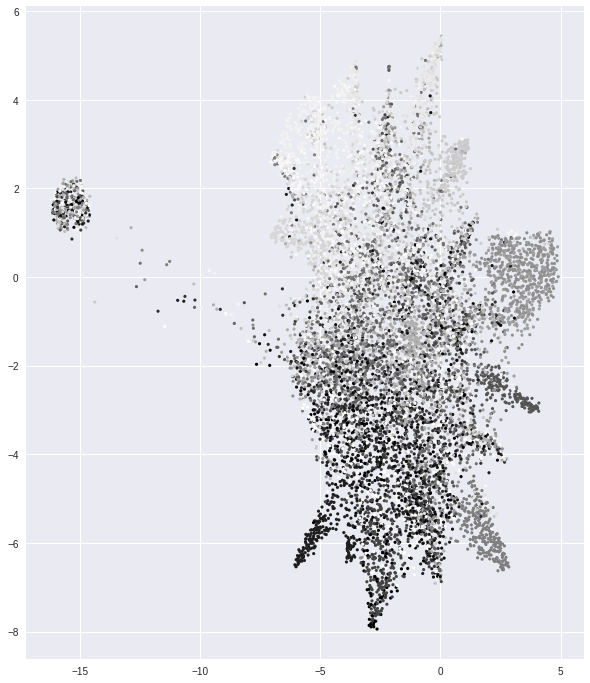

In [0]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150,min_dist=0.5,random_state=12).fit_transform(X_topics)

plt.figure(figsize=(10,12))
plt.scatter(embedding[:,0],embedding[:,1],c=dataset.target,s=10,edgecolors='none')

In [0]:
pwd

'/content'